In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
df['Gender'] = Encoder.fit_transform(df['Gender'])

In [6]:
df['Gender']

,Gender
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [9]:
df_process = pd.concat([df], axis=1 , join='inner' )
df_process.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [10]:
df_process =df_process.drop(columns=['CustomerID'])
df_process.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [12]:
df_process.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=300, init='k-means++',n_init=10, random_state=0)
kmeans.fit(df_process)

kmeans.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

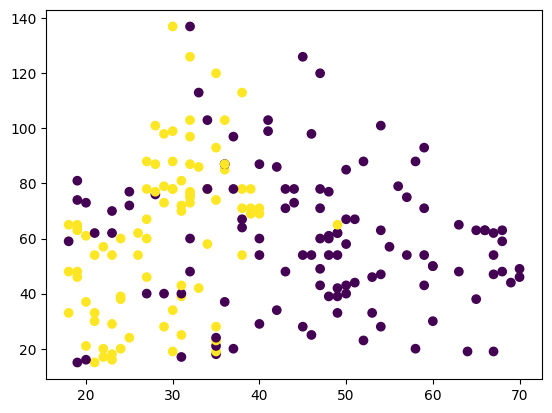

In [17]:
import matplotlib.pyplot as plt

x=df_process['Age']
y=df_process['Annual Income (k$)']
plt.scatter(x,y , c=kmeans.labels_ , cmap='viridis')
plt.show()

In [20]:
x = df_process[['Annual Income (k$)', 'Spending Score (1-100)']] # Use square brackets to select columns

from sklearn.cluster import KMeans # Make sure KMeans is imported

model = KMeans(n_clusters=5) # Change Kmeans to KMeans
y_pred = model.fit_predict(x)

In [21]:
y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

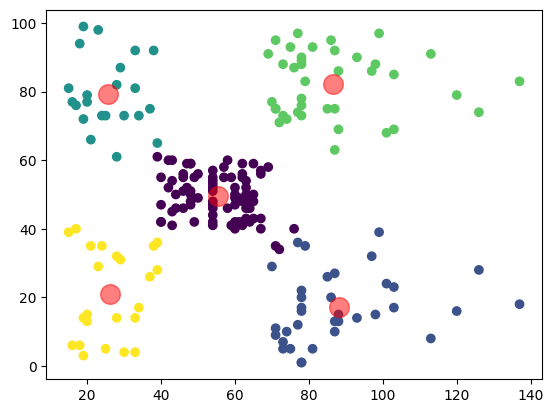

In [26]:
plt.scatter(x=x['Annual Income (k$)'], y=x['Spending Score (1-100)'], c=y_pred) # Changed X to x

centers = model.cluster_centers_
plt.scatter(x=centers[:, 0], y=centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

In [28]:
df_pred = pd.DataFrame(y_pred , columns=['clusters' ]) # Changed Dataframe to DataFrame

df_clusters = pd.concat([df , df_pred] , axis=1 , join='inner')
df_clusters.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


In [32]:
df_cluster_0 = df_clusters[df_clusters['clusters'] == 0]
df_cluster_1 = df_clusters[df_clusters['clusters'] == 1]
df_cluster_2 = df_clusters[df_clusters['clusters'] == 2]

In [33]:
df_cluster_0.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.0
mean,86.320988,0.407407,42.716049,55.296296,49.518519,0.0
std,24.240889,0.494413,16.447822,8.988109,6.530909,0.0
min,44.000000,0.000000,18.000000,39.000000,34.000000,0.0
25%,66.000000,0.000000,27.000000,48.000000,44.000000,0.0
50%,86.000000,0.000000,46.000000,54.000000,50.000000,0.0
75%,106.000000,1.000000,54.000000,62.000000,55.000000,0.0
max,143.000000,1.000000,70.000000,76.000000,61.000000,0.0
